In [274]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load data

The first step in a data engineering pipeline for machine learning is to ingest the data that will be used. For this project, data is hosted on a public GitHub repo. 

Your tasks:
* Import data from the provided GitHub repo using `pandas`
* Verify that the data has been imported correctly into `pandas` dataframes. Use methods like `head()` and `info()`
* You may need to change column names to make them easier to work with
* You may need to cast datetime data to the `datetime` format using `pandas` `to_datetime()` method

Data files to import: 
1. GDP
2. Inflation 
3. Apple stock prices 
4. Microsoft stock prices

In [275]:
# Load historical GDP data
data = pd.read_csv('GDP.csv')

In [276]:
# Check the first few rows of data
data.head()



,DATE,GDP
0,1947-01-01,243.164
1,1947-04-01,245.968
2,1947-07-01,249.585
3,1947-10-01,259.745
4,1948-01-01,265.742


In [277]:
# Load the historical stock price data for Apple and Microsoft
apple_data = pd.read_csv('apple_historical_data.csv')
microsoft_data = pd.read_csv('microsoft_historical_data.csv')


In [278]:
# change Date column to datetime and set it as index
apple_data['Date'] = pd.to_datetime(apple_data['Date'])
apple_data = apple_data.set_index('Date')
microsoft_data['Date'] = pd.to_datetime(microsoft_data['Date'])
microsoft_data = microsoft_data.set_index('Date')
# Change the Column name of Close/Last to Close
apple_data.rename(columns={'Close/Last': 'Close'}, inplace=True)
microsoft_data.rename(columns={'Close/Last': 'Close'}, inplace=True)
apple_data.head()
microsoft_data.head()



,Close,Volume,Open,High,Low
Date,,,,,
2024-05-03,$406.66,17446720,$402.28,$407.15,$401.86
2024-05-02,$397.84,17709360,$397.66,$399.93,$394.6515
2024-05-01,$394.94,23562480,$392.61,$401.7199,$390.31
2024-04-30,$389.33,28781370,$401.49,$402.16,$389.17
2024-04-29,$402.25,19582090,$405.25,$406.32,$399.19


In [279]:
# Check for nulls
apple_data.isnull().sum()
#microsoft_data.isnull().sum()


Close     3
Volume    0
Open      0
High      0
Low       0
dtype: int64

In [280]:
# Forward fill the nulls
apple_data = apple_data.ffill()
microsoft_data = microsoft_data.ffill()



In [281]:
# Check again for nulls after using forward fill
apple_data.isnull().sum()
#microsoft_data.isnull().sum()


Close     0
Volume    0
Open      0
High      0
Low       0
dtype: int64

In [282]:
apple_data.head()

,Close,Volume,Open,High,Low
Date,,,,,
2024-05-03,$183.38,163224100,$186.65,$187.00,$182.66
2024-05-02,$173.03,94214920,$172.51,$173.42,$170.89
2024-05-01,$169.30,50383150,$169.58,$172.71,$169.11
2024-04-30,$170.33,65934780,$173.33,$174.99,$170.00
2024-04-29,$173.50,68169420,$173.37,$176.03,$173.10


In [283]:
apple_data.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2517 entries, 2024-05-03 to 2014-05-06
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Close   2517 non-null   object
 1   Volume  2517 non-null   int64 
 2   Open    2517 non-null   object
 3   High    2517 non-null   object
 4   Low     2517 non-null   object
dtypes: int64(1), object(4)
memory usage: 118.0+ KB


In [284]:
def convert_dollar_columns_to_numeric(df, numeric_columns):
    '''
        Removes dollar signs ('$') from a list of columns in a given dataframe AND casts the columns to a numeric datatype.
        Updates dataframe IN PLACE.
        
        Inputs:
            df: dataframe to be operated on
            numeric_columns: columns that should have numeric data but have dollar signs currently
            
        Returns:
            None - changes to the dataframe can be made in place
    '''
    for column in numeric_columns:
        if df[column].dtype == 'object':
            df[column] = df[column].str.replace('$', '').astype(float)
    
    return df

In [285]:
microsoft_data.head()

,Close,Volume,Open,High,Low
Date,,,,,
2024-05-03,$406.66,17446720,$402.28,$407.15,$401.86
2024-05-02,$397.84,17709360,$397.66,$399.93,$394.6515
2024-05-01,$394.94,23562480,$392.61,$401.7199,$390.31
2024-04-30,$389.33,28781370,$401.49,$402.16,$389.17
2024-04-29,$402.25,19582090,$405.25,$406.32,$399.19


In [286]:
# Use convert_dollar_columns_to_numeric() to remove the dollar sign from the Apple and Microsoft datasets
convert_dollar_columns_to_numeric(apple_data, ['Close', 'Open', 'High', 'Low'])
convert_dollar_columns_to_numeric(microsoft_data, ['Close', 'Open', 'High', 'Low'])



,Close,Volume,Open,High,Low
Date,,,,,
2024-05-03,406.660,17446720,402.28,407.1500,401.8600
2024-05-02,397.840,17709360,397.66,399.9300,394.6515
2024-05-01,394.940,23562480,392.61,401.7199,390.3100
2024-04-30,389.330,28781370,401.49,402.1600,389.1700
2024-04-29,402.250,19582090,405.25,406.3200,399.1900
...,...,...,...,...,...
2014-05-12,39.970,22761620,39.74,40.0200,39.6500
2014-05-09,39.540,29646100,39.54,39.8500,39.3700
2014-05-08,39.640,32089010,39.34,39.9000,38.9700


In [287]:
# Align inflation data so that the data is the month end 
inflation_data = pd.read_csv('inflation_monthly.csv')
# change the column name of DATE to Date, and convert to datetime format
inflation_data.rename(columns={'DATE': 'Date'}, inplace=True)
inflation_data['Date'] = pd.to_datetime(inflation_data['Date'])
# use the pandas offsets method to set the Date  to month end
inflation_data['Date'] = inflation_data['Date'] + pd.offsets.MonthEnd(0)
# Change column name of VALUE to Inflation
inflation_data.rename(columns={'CORESTICKM159SFRBATL': 'Inflation'}, inplace=True)
inflation_data = inflation_data.set_index('Date')
inflation_data.head()

,Inflation
Date,
1968-01-31,3.651861
1968-02-29,3.673819
1968-03-31,4.142164
1968-04-30,4.155828
1968-05-31,4.088245


## Data preprocessing: Upsample, downsample and interpolate data

Inflation data is presented monthly in this dataset. However, for some models, you may need it at a quarterly frequency, and for some models you may need it at a quarterly frequency. 

In this step:
* Create a new quarterly inflation dataframe by downsampling the monthly inflation data to quarterly using the mean (e.g. for quarter 1 in a given year, use the average values from January, February, and March)
* Create a new weekly inflation dataframe by upsampling the monthly inflation data. For this, you'll need to use `resample` and then you'll need to `interpolate` to fill in the missing data at the weekly frequency

Note that you may need to change the index for some of these operations! 

In [288]:
# Upsample and interpolate from monthly to weekly , use interpolate to fill in the missing data at the weekly frequency
weekly_inflation = inflation_data.resample('W').asfreq()
weekly_inflation = weekly_inflation.interpolate(method='linear', limit_direction='both')

In [289]:
# Downsample from monthly to quarterly 
quarterly_inflation = inflation_data.resample('Q').mean()
quarterly_inflation.head()

,Inflation
Date,
1968-03-31,3.822615
1968-06-30,4.263214
1968-09-30,4.882643
1968-12-31,5.429443
1969-03-31,5.873770


## Data preprocessing: Normalize/standardize a feature

Economic time series data often involve variables measured on different scales (e.g., GDP in trillions of dollars, inflation in percentage points). Standardizing these variables (typically by subtracting the mean and dividing by the standard deviation) puts them on a common scale, allowing for meaningful comparisons and analyses.

Your task:
* Standardize the GDP data. You may do this manually by subtracting the mean and dividing by the standard deviation, or you may use a built-in method from a library like `sklearn`'s `StandardScaler`

In [290]:
from sklearn.preprocessing import StandardScaler

In [291]:
# change column name DATE to Date, set it as index
data.rename(columns={'DATE': 'Date'}, inplace=True)
data['Date'] = pd.to_datetime(data['Date'])
data = data.set_index('Date')
data.head()

,GDP
Date,
1947-01-01,243.164
1947-04-01,245.968
1947-07-01,249.585
1947-10-01,259.745
1948-01-01,265.742


In [292]:
# Standardize the GDP measure
scaler = StandardScaler()
data['GDP'] = scaler.fit_transform(data[['GDP']])
data.head()

,GDP
Date,
1947-01-01,-0.935496
1947-04-01,-0.935121
1947-07-01,-0.934636
1947-10-01,-0.933276
1948-01-01,-0.932472


In [293]:
# Check the dataframe to make sure the calculation worked as expected 
data.describe()

,GDP
count,3.090000e+02
mean,-1.839593e-16
std,1.001622e+00
min,-9.354964e-01
25%,-8.602482e-01
50%,-3.805131e-01
75%,7.097946e-01
max,2.820281e+00


## EDA: Plotting a time series of adjusted open vs close price

As part of your EDA, you'll frequently want to plot two time series on the same graph and using the same axis to compare their movements. 

Your task:
* Plot the Apple open and close price time series on the same chart **for the last three months only**. Be sure to use a legend to label each line

**NOTE**: This is a large dataset. If you try to plot the entire series, your graph will be hard to interpret and may take a long time to plot. Be sure to use only the most recent three months of data. 

In [294]:
# get max date in timeseries
apple_data = pd.read_csv('apple_historical_data.csv')
apple_data['Date'] = pd.to_datetime(apple_data['Date'])
apple_data = apple_data.set_index('Date')
apple_data.rename(columns={'Close/Last': 'Close'}, inplace=True)
apple_data  = convert_dollar_columns_to_numeric(apple_data, ['Close', 'Open', 'High', 'Low'])
max_date = apple_data.index.max()

max_date


Timestamp('2024-05-03 00:00:00')

In [295]:
# Use the max date calculated above to get the last three months of data in the dataset 
apple_data_recent = apple_data[apple_data.index >= max_date - pd.DateOffset(months=3)]


In [296]:
# set Close/Last to Close
apple_data_recent.head()

,Close,Volume,Open,High,Low
Date,,,,,
2024-05-03,183.38,163224100,186.65,187.00,182.66
2024-05-02,173.03,94214920,172.51,173.42,170.89
2024-05-01,169.30,50383150,169.58,172.71,169.11
2024-04-30,170.33,65934780,173.33,174.99,170.00
2024-04-29,173.50,68169420,173.37,176.03,173.10


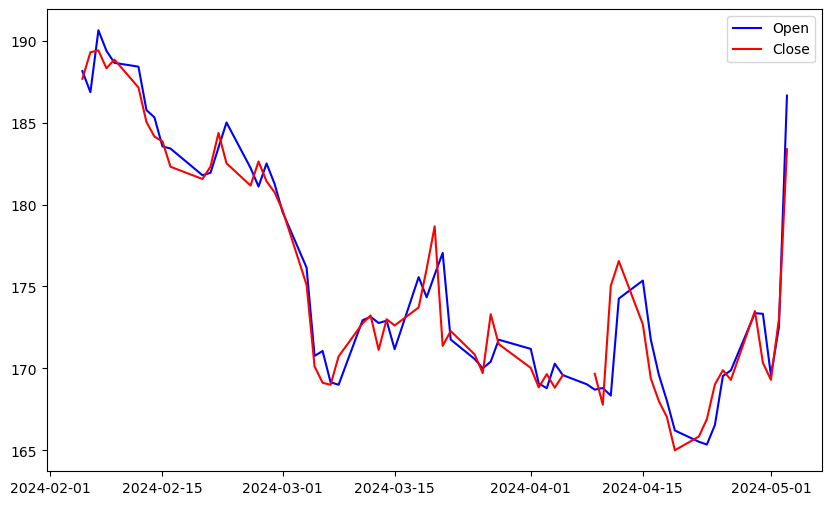

In [297]:
# Plot time series of open v. close stock price for Apple using the last 3 months of data
plt.figure(figsize=(10, 6))
plt.plot(apple_data_recent['Open'], label='Open', color='blue')
plt.plot(apple_data_recent['Close'], label='Close', color='red')
plt.legend()
plt.show()

## EDA: Plotting a histogram of a stock's closing price in the last three months

One way to see how much a stock's price generally moves is to plot the frequency of closing prices over a set time period. 

Your task:
* Use the **last three months** of Apple stock data and plot a histogram of closing price

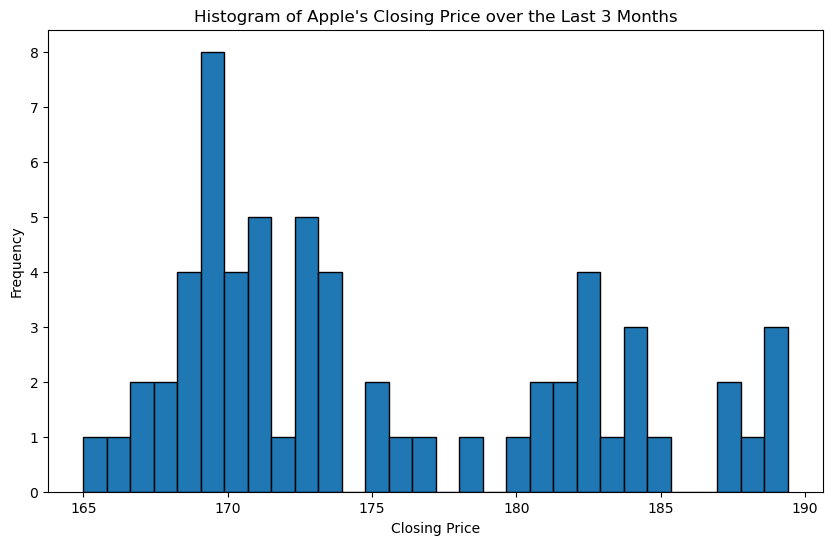

In [298]:
# Plot the histogram of Apple's closing price over the last 3 months 
plt.figure(figsize=(10, 6))
plt.hist(apple_data_recent['Close'], bins=30, edgecolor='black')
plt.title('Histogram of Apple\'s Closing Price over the Last 3 Months')
plt.xlabel('Closing Price')
plt.ylabel('Frequency')
plt.show()

## Calculating correlation between a stock price and a macroeconomic variable 

Inflation affects the purchasing power of money and can influence corporate profits, interest rates, and consumer behavior. By analyzing the correlation between stock prices and inflation, one can gauge how inflationary trends impact stock market performance. For instance, high inflation might erode profit margins and reduce stock prices, while moderate inflation might indicate a growing economy, benefiting stocks.

Your task:
* Plot a heatmap that shows the correlation between Microsoft and Apple returns and inflation 

This will require several steps:
1. Calculate the returns for Apple and Microsoft and the change in monthly inflation (use the `pct_change` method for each)
2. Interpolate the daily stock returns data to monthly so it can be compared to the monthly inflation data
3. Merge the stock returns (Apple and Microsoft) and inflation data series into a single dataframe
4. Calculate the correlation matrix between the Apple returns, Microsoft returns, and inflation change
5. Plot the correlation matrix as a heatmap

In [299]:
# Calculate daily returns for Apple and Microsoft and the percent change in inflation from month to month
microsoft_data = pd.read_csv('microsoft_historical_data.csv')
microsoft_data['Date'] = pd.to_datetime(microsoft_data['Date'])
microsoft_data = microsoft_data.set_index('Date')
microsoft_data.rename(columns={'Close/Last': 'Close'}, inplace=True)
microsoft_data = convert_dollar_columns_to_numeric(microsoft_data, ['Close', 'Open', 'High', 'Low'])
microsoft_data['Return'] = microsoft_data['Close'].pct_change()
inflation_data['Change'] = inflation_data['Inflation'].pct_change()

apple_data['Return'] = apple_data['Close'].pct_change()

/var/folders/mz/5tgw77g16zbgwtbm1f3zsg5r0000gn/T/ipykernel_26616/890757291.py:10: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  apple_data['Return'] = apple_data['Close'].pct_change()


In [300]:
# Only keep the Return column
microsoft_return = microsoft_data[['Return']]
apple_return = apple_data[['Return']]
inflation_change = inflation_data[['Change']]


In [301]:
# Interpolate stock return from daily to monthly
microsoft_return = microsoft_return.resample('M').asfreq()
microsoft_return = microsoft_return.interpolate(method='linear', limit_direction='both')
apple_return = apple_return.resample('M').asfreq()
apple_return = apple_return.interpolate(method='linear', limit_direction='both')


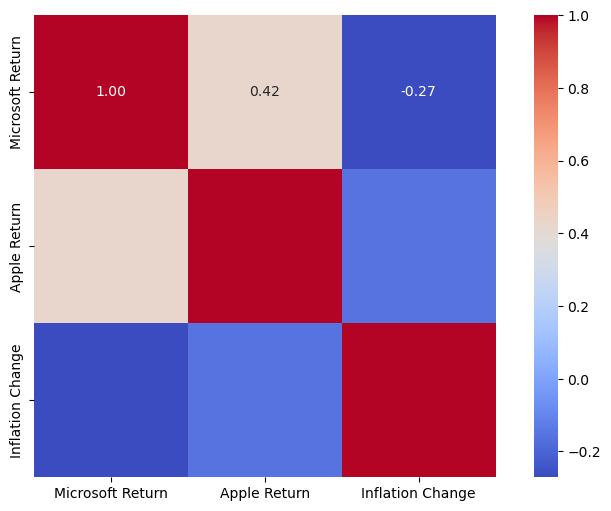

In [303]:
# Merge to dataframes and calculate / plot the correlation
microsoft_return.columns = ['Microsoft Return']
apple_return.columns = ['Apple Return']
inflation_change.columns = ['Inflation Change']
merged_data = pd.concat([microsoft_return, apple_return, inflation_change], axis=1)
merged_corr = merged_data.corr()

# Plot the correlation
plt.figure(figsize=(10, 6))
sns.heatmap(merged_corr, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.show()


## Calculating rolling volatility (standard deviation) of a stock's price for last 3 months

Volatility is a measure of the dispersion of returns for a given security. By calculating rolling volatility, investors can assess the risk associated with a stock over time: Higher volatility indicates higher risk, as the stock's price is more likely to experience significant fluctuations. In portfolio optimization, understanding the volatility of individual stocks and how it changes over time is crucial for diversification and optimization. By analyzing rolling volatility, investors can adjust their portfolios to maintain a desired risk level, potentially improving the risk-return profile.

One possible way to calculate volatility is by using the standard deviation of returns for a stock over time.

Your task:
* Calculate the weekly rolling standard deviation for Apple's closing price
* Plot the calculated rolling weekly volatility of Apple's closing price against Apple's closing price. Plot these **on the same chart, but using different y-axes**

Helpful hints:
* You'll need to use the `pandas` `rolling()` method with a given `window_size` parameter to make it a _weekly_ rolling calculation
* Use **only the last three months of data**; data much older than this may not be as useful for portfolio optimization
* You'll need to create two axes on the matplotlib figure to be able to use two different y-axes (one for the closing price and one for the rolling volatility calculated here)

In [308]:
# Define the window size for the rolling calculation (e.g., one week)
window_size = 5

# Calculate the rolling standard deviation
apple_rolling_std = apple_data_recent['Close'].rolling(window=window_size).std()



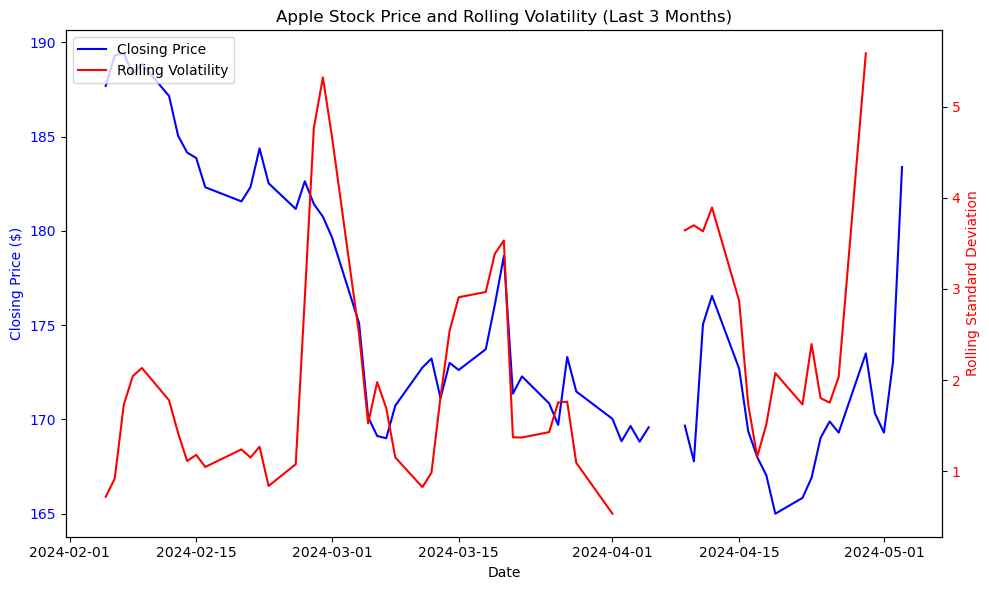

In [310]:
fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.set_xlabel('Date')
ax1.set_ylabel('Closing Price ($)', color='blue')
line1 = ax1.plot(apple_data_recent['Close'], 
                 label='Closing Price', 
                 color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()

ax2.set_ylabel('Rolling Standard Deviation', color='red')
line2 = ax2.plot(apple_rolling_std, 
                 label='Rolling Volatility', 
                 color='red')
ax2.tick_params(axis='y', labelcolor='red')

lines = line1 + line2
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper left')

plt.title('Apple Stock Price and Rolling Volatility (Last 3 Months)')

plt.tight_layout()
plt.show()

In [ ]:
# Export all midified datasets back to new csv files
data.to_csv('GDP_standardized.csv')
apple_data.to_csv('apple_data_modified.csv')
microsoft_data.to_csv('microsoft_data_modified.csv')
inflation_data.to_csv('inflation_data_modified.csv')
